# <span style='color:blue'> FINAL PROJECT</span>
## <span style='color:darkcyan'> Dataset1 URL: http://insideairbnb.com/get-the-data.html  </span>


This data set consists of three types of entities:

<br><ins>DATASET 1: 37713 rows and 18 columns</ins>

<br> 1) Airbnb is one of the world’s largest marketplaces for unique, authentic places to stay and things to do, offering over 7 million accommodations and 50,000 handcrafted activities, all powered by local hosts. An economic empowerment engine, Airbnb has helped millions of hospitality entrepreneurs monetize their spaces and their passions while keeping the financial benefits of tourism in their own communities. With more than three quarters of a billion guest arrivals to date, and accessible in 62 languages across 220+ countries and regions, Airbnb promotes people-to-people connection, community and trust around the world.

----------------------------------------------------------------------------------------------------------------------

## <span style='color:darkcyan'> Dataset2 URL: https://data.cityofnewyork.us/Transportation/Open-Restaurants-Inspections/4dx7-axux/data  </span>

<br><ins>DATASET 1: 383509 rows and 26 columns</ins>

<br> 1) The dataset contains every sustained or not yet adjudicated violation citation from every full or special program inspection conducted up to three years prior to the most recent inspection for restaurants and college cafeterias in an active status on the RECORD DATE  When an inspection results in more than one violation, values for associated fields are repeated for each additional violation record. Establishments are uniquely identified by their CAMIS (record ID) number.
<br> 2) Only restaurants in an active status are included in the dataset.
<br> 3) Records are also included for each restaurant that has applied for a permit but has not yet been inspected and for inspections resulting in no violations. Establishments with inspection date of 1/1/1900 are new establishments that have not yet received an inspection. Restaurants that received no violations are represented by a single row and coded as having no violations using the ACTION field.
<br> 4) So how are these grades actually determined? Per DOHMH, restaurants receive an initial inspection during which they are assigned points for any violations found. If those points add up to less than 14, the restaurant receives an A and will be reinspected in 12 months. If the restaurant receives 14 or more points, the restaurant will be reinspected 7 or more days later. 

Note: Several of the attributes in the database could be used as a "class" attribute.


# <span style='color:darkcyan'> AIRBNB DATA ANALYSIS </span>

## <span style='color:darkcyan'> 1. Importing libraries </span>

In [1]:
import numpy as np
import pandas as pd
#import cudf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import datetime
import time

## <span style='color:darkcyan'> 2. Importing data<span style='color:green'>

In [2]:
airbnb = pd.read_csv('listings.csv', low_memory=False) 

## <span style='color:darkcyan'> 3. Preprocessing <span style='color:green'>

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#display rows
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,322,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,73,1,408,2021-06-29,4.91,1,220,38,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.53,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,91,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,505,2021-10-20,3.70,1,218,31,NaN


In [5]:
airbnb.shape

(37713, 18)

In [6]:
#check all the column names
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37713 entries, 0 to 37712
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37713 non-null  int64  
 1   name                            37700 non-null  object 
 2   host_id                         37713 non-null  int64  
 3   host_name                       37682 non-null  object 
 4   neighbourhood_group             37713 non-null  object 
 5   neighbourhood                   37713 non-null  object 
 6   latitude                        37713 non-null  float64
 7   longitude                       37713 non-null  float64
 8   room_type                       37713 non-null  object 
 9   price                           37713 non-null  int64  
 10  minimum_nights                  37713 non-null  int64  
 11  number_of_reviews               37713 non-null  int64  
 12  last_review                     

In [7]:
#as dataset is large lets check the size
airbnb.size

678834


###  <span style='color:darkcyan'> 3.1 Drop columns that are not required for our analysis <span style='color:green'>

In [8]:

airbnb = airbnb.drop(columns=['license','host_id', 'calculated_host_listings_count', 'last_review'])
#,'latitude','longitude'])



###  <span style='color:darkcyan'> 3.2 Lets change the column name neighbourhood_group as we'll be using this column to merge the 2 datasets later on <span style='color:green'>

In [9]:

airbnb = airbnb.rename(columns={"neighbourhood_group": "BORO"}, errors="raise")

###  <span style='color:darkcyan'> 3.3 Checking basic descriptive statistics for numerical columns. <span style='color:green'>
    

In [10]:

airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
count,3.771300e+04,37713.000000,37713.000000,37713.000000,37713.000000,37713.000000,28501.000000,37713.000000,37713.000000
mean,2.883977e+07,40.729186,-73.949361,165.422560,22.130645,23.233368,1.640820,129.722642,4.675576
std,1.710942e+07,0.055662,0.050442,292.366182,30.809556,50.153962,4.220807,141.743493,14.257903
min,2.595000e+03,40.504559,-74.249840,0.000000,1.000000,0.000000,0.010000,0.000000,0.000000
25%,1.309845e+07,40.689380,-73.983620,69.000000,3.000000,1.000000,0.120000,0.000000,0.000000
50%,2.996451e+07,40.725160,-73.955020,110.000000,30.000000,4.000000,0.470000,67.000000,0.000000
75%,4.547279e+07,40.762510,-73.930950,180.000000,30.000000,20.000000,1.690000,294.000000,3.000000
max,5.312763e+07,40.914070,-73.710870,10000.000000,1250.000000,1009.000000,136.000000,365.000000,624.000000


#### How can the price be 0? Doesnt seem right. Either remove or replece the value. Since our data is huge, Lets remov

In [11]:
airbnb = airbnb[airbnb['price'] != 0]


###  <span style='color:darkcyan'> 3.4 Check for duplicate values <span style='color:green'>

In [12]:
airbnb.drop_duplicates(subset=None, keep="first", inplace=True)

In [13]:
airbnb['name'].duplicated().sum()

1254

In [14]:
airbnb = airbnb.drop_duplicates(subset=['name'], keep='last')

In [15]:
airbnb['name'].duplicated().sum()

0


###  <span style='color:darkcyan'> 3.5 Check for all null values <span style='color:green'>

In [16]:
airbnb.isnull().sum()

id                          0
name                        1
host_name                  23
BORO                        0
neighbourhood               0
latitude                    0
longitude                   0
room_type                   0
price                       0
minimum_nights              0
number_of_reviews           0
reviews_per_month        8731
availability_365            0
number_of_reviews_ltm       0
dtype: int64

In [17]:
airbnb.columns

Index(['id', 'name', 'host_name', 'BORO', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [18]:
#It is no use to us if we dont know the name of the airbnb- therefore drop
airbnb = airbnb.dropna(subset=['name'])
                       #,'neighbourhood_group']

In [19]:
airbnb['host_name'] = airbnb['host_name'].fillna('unknown')

In [20]:
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)

###  <span style='color:darkcyan'> 3.6 Brief Insight of Airbnb listings <span style='color:green'>



In [21]:
#Brief Insight of Airbnb listings

print("Number of properties:")
print(len(airbnb["id"]))

print("")
print("Number of unique host:")
print(len(airbnb["host_name"].unique()))

print("")
print("Number of Room Type:")
print(len(airbnb["room_type"].unique()))

print("")
print("Number of Unique Borough:")
print(len(airbnb["BORO"].unique()))
print(airbnb["BORO"].unique())

print("")
print("Average Price for All New york:")
print(round(airbnb.price.mean(),2))

print("")
print("Maximum Price for All New york:")
print(round(airbnb.price.max(),2))

print("")
print("Minimum Price for All New york:")
print(round(airbnb.price.min(),2))

print("")
print("Number of 0 (Zero) Price:")
print(len(airbnb[airbnb["price"]==0]))

print("")
print("Average Number of Reviews for All Newyork:")
print(round(airbnb.number_of_reviews.mean(),2))

Number of properties:
36419

Number of unique host:
8975

Number of Room Type:
4

Number of Unique Borough:
5
['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']

Average Price for All New york:
166.24

Maximum Price for All New york:
10000

Minimum Price for All New york:
10

Number of 0 (Zero) Price:
0

Average Number of Reviews for All Newyork:
23.5


In [22]:
#309765

In [23]:
airbnb.shape

(36419, 14)

## <span style='color:darkcyan'> 4. Visualization <span style='color:green'>

###  <span style='color:darkcyan'> 4.1 Distribution of id, Latitude, Longitude, price, minimum_nights, num_of_reviews, reviews_per_month, availability_365, num_of_reviews <span style='color:green'>


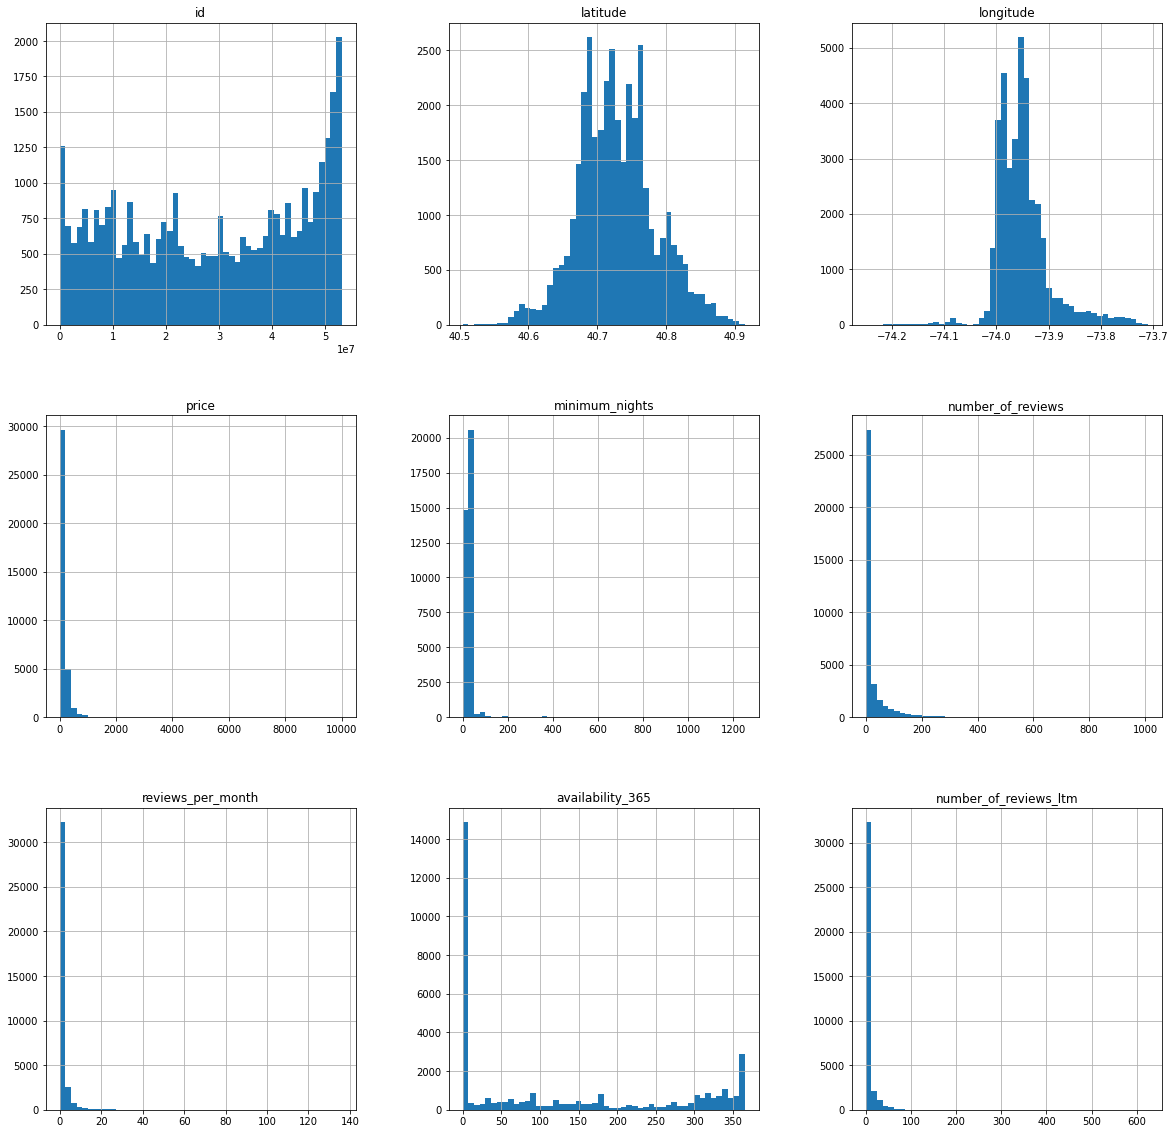

In [24]:
#Hist graph is great because in one go it gives a lot of information, i.e., we can see below 
#that the maximum price is about 3000 and there is a tail, max of minimum_nights is 20000, 
#there is availablity 365 in about 14000 hotls etc
airbnb.hist(bins = 50 , figsize = (20,20))
plt.show()

###  <span style='color:darkcyan'> 4.2 Barplot of Room Type <span style='color:green'>
 

In [25]:
room_type_group_count = airbnb.groupby("room_type").id.count().sort_values(ascending=False)
room_type_group_count = room_type_group_count.reset_index()
room_type_group_count.rename(columns={"id":"count"}, inplace=True)
room_type_group_count["percentage"]=round(room_type_group_count["count"] / room_type_group_count["count"].sum()*100,2)
room_type_group_count

,room_type,count,percentage
0,Entire home/apt,19678,54.03
1,Private room,15983,43.89
2,Shared room,559,1.53
3,Hotel room,199,0.55


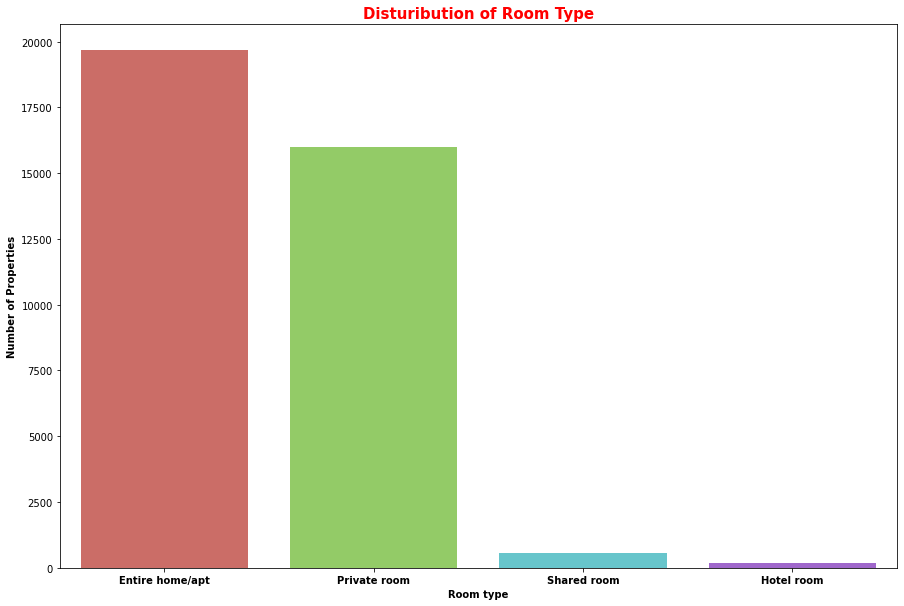

In [26]:
#Barplot of Room Type 

plt.figure(figsize=(15,10))

ax = sns.barplot(x="room_type", y="count", data=room_type_group_count,  palette="hls")
plt.title("Disturibution of Room Type", weight="bold", c="red", fontsize=15)
plt.xlabel("Room type",weight="bold",c="k")
plt.xticks(weight="bold")
plt.ylabel("Number of Properties", weight="bold",c="k")


plt.show()

## <span style='color:darkcyan'> 4.3 Room Type on Neighbourhood Group <span style='color:green'> 

/Users/tej/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


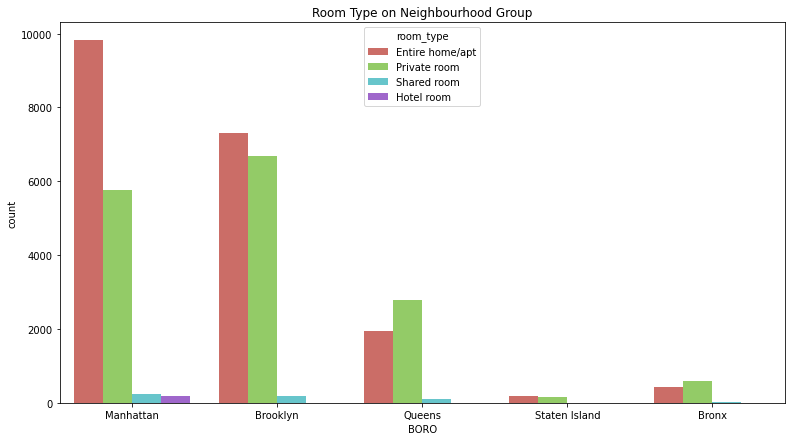

In [27]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(airbnb.BORO,hue=airbnb.room_type, palette="hls")
plt.show()

### <span style='color:darkcyan'> 4.4 Barplot of Borough <span style='color:green'>
    

In [28]:
# Group by Borough for count

borough_group_count = airbnb.groupby("BORO").id.count().sort_values(ascending=False)
borough_group_count = borough_group_count.reset_index()
borough_group_count.rename(columns={"id":"count"}, inplace=True)
borough_group_count["percentage"]=round(borough_group_count["count"]/borough_group_count["count"].sum()*100,2)
borough_group_count.head(10)

,BORO,count,percentage
0,Manhattan,16015,43.97
1,Brooklyn,14164,38.89
2,Queens,4865,13.36
3,Bronx,1036,2.84
4,Staten Island,339,0.93


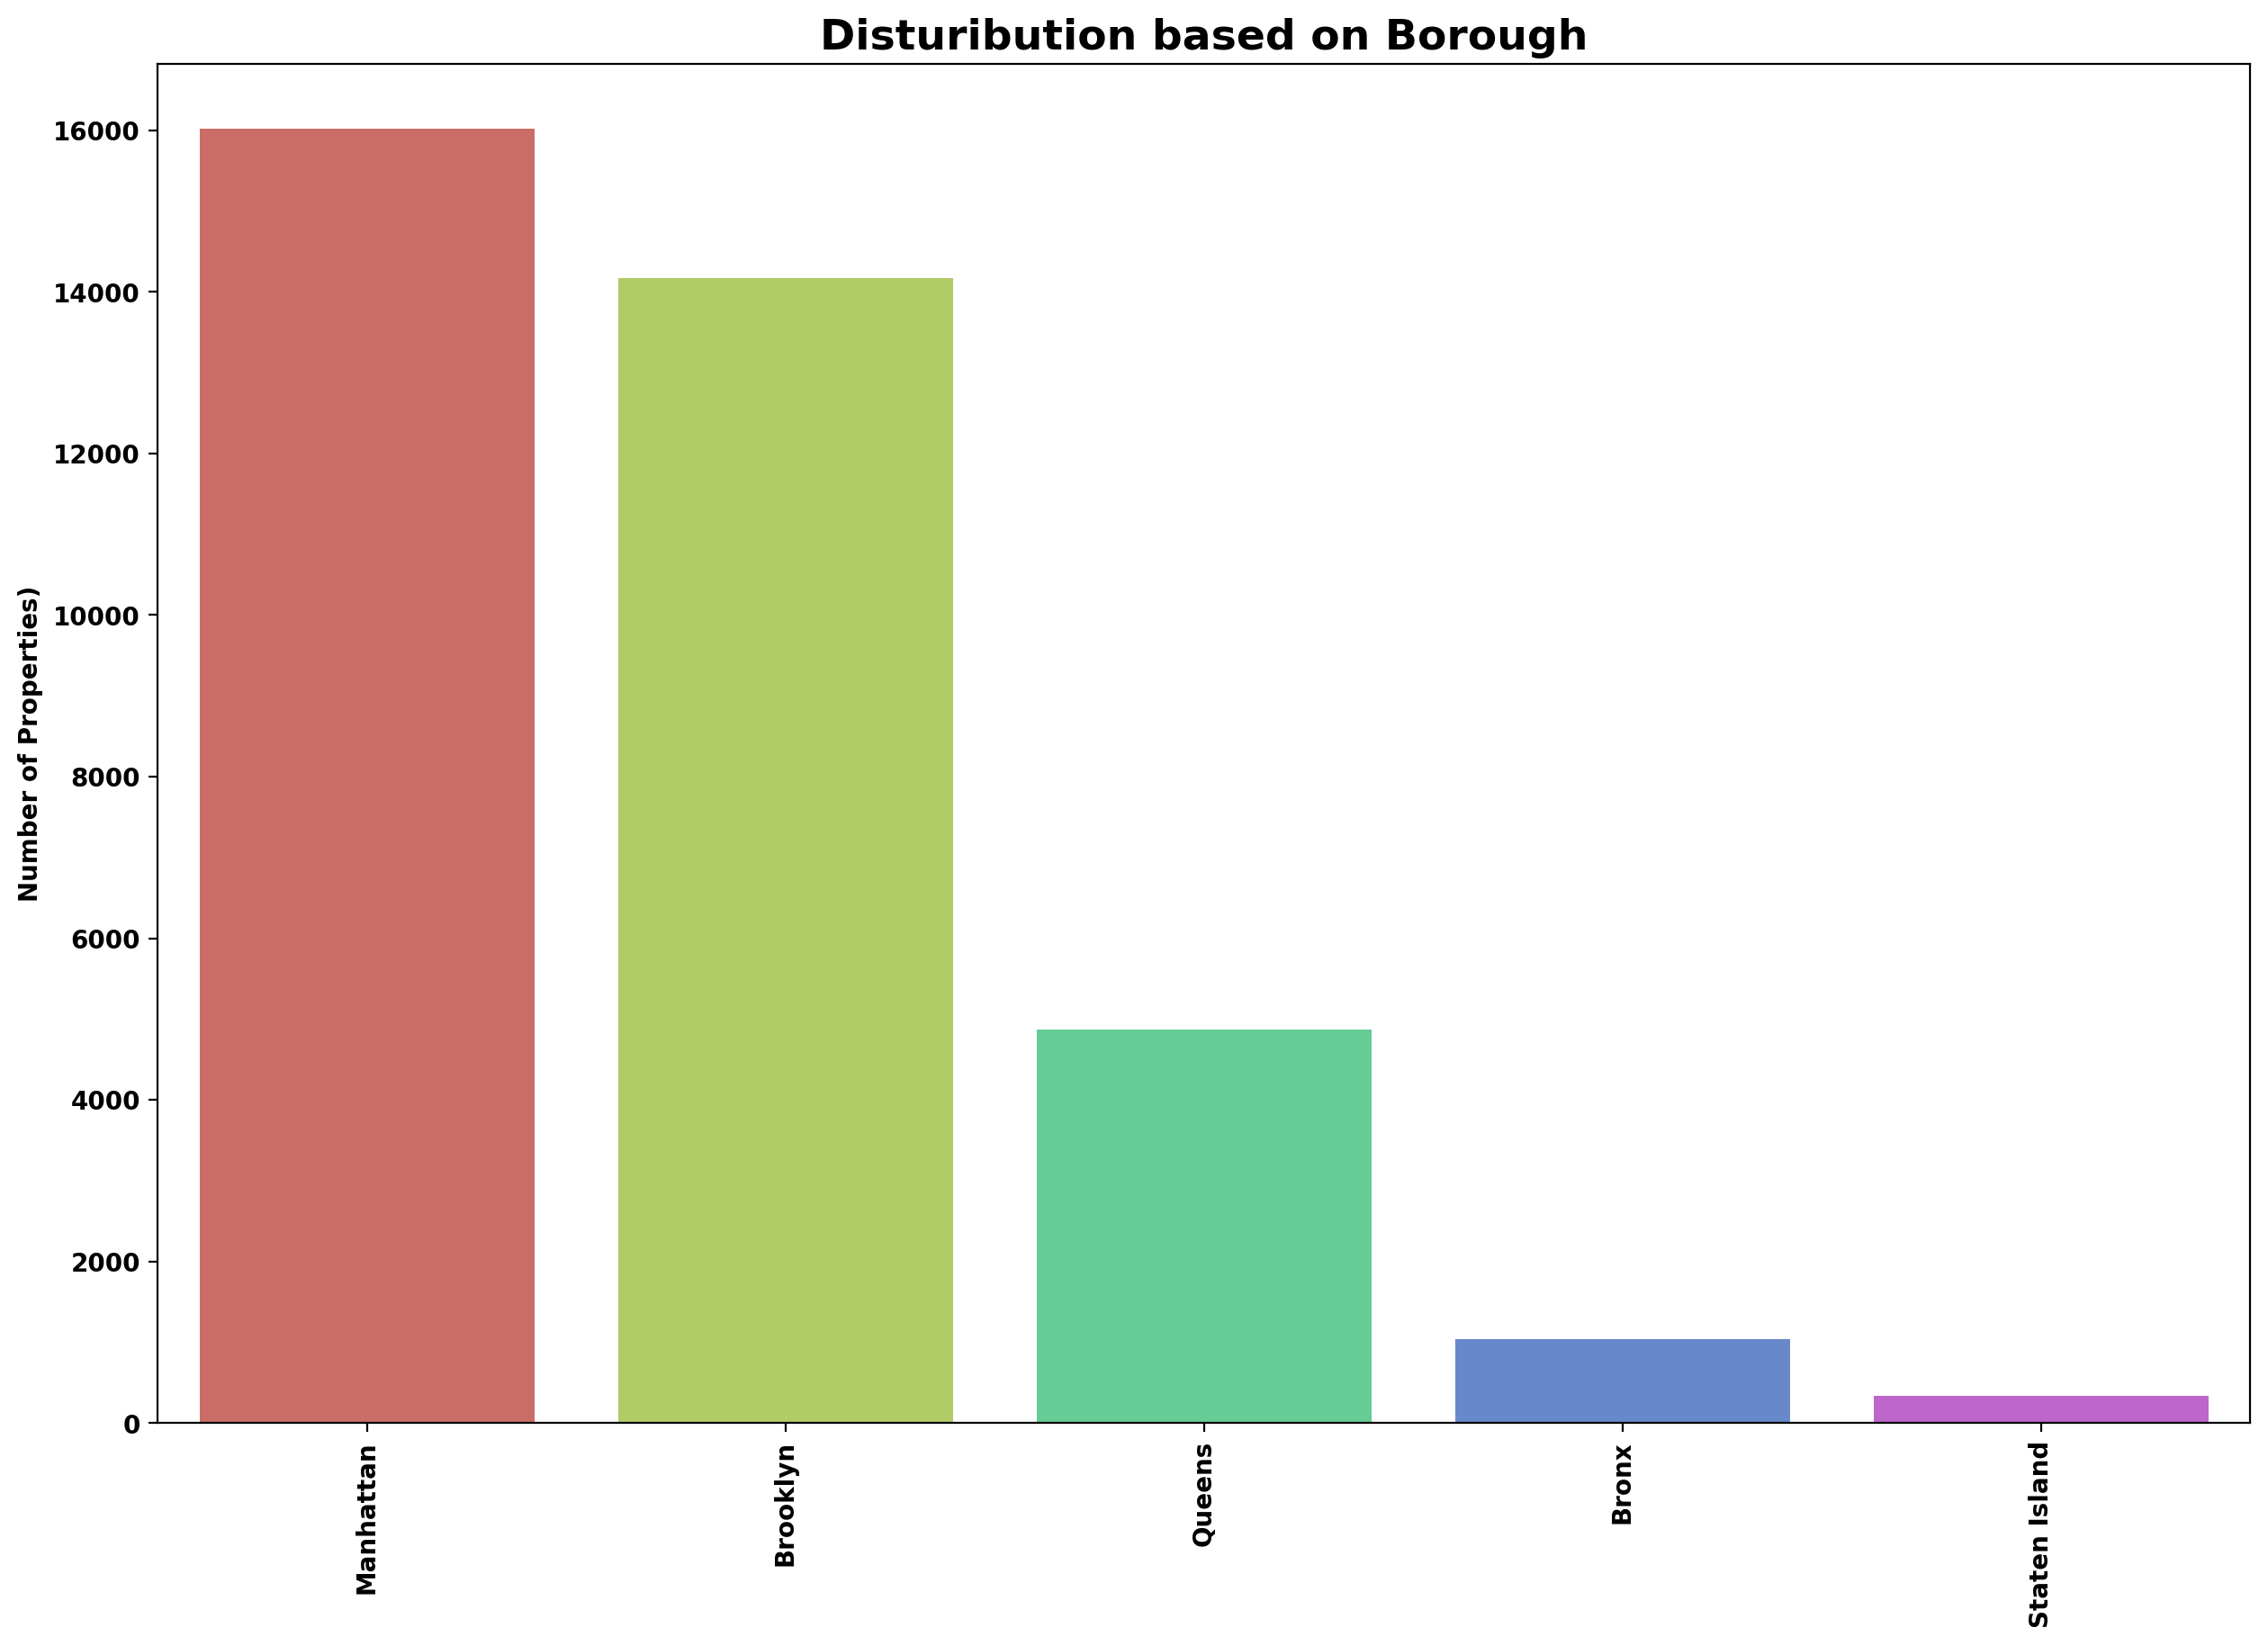

In [29]:
#Barplot of Borough 

plt.figure(figsize=(15,10),dpi=200),

ax = sns.barplot(x="BORO", y="count", data=borough_group_count,  palette="hls")
plt.title("Disturibution based on Borough", weight="bold", c="black", fontsize=17)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties)",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.show()

### <span style='color:darkcyan'> 4.5 Average Price / Night by Borough <span style='color:green'>
    


In [30]:
# Group by Borough for price

borough_group_price = airbnb.groupby("BORO").price.mean().sort_values(ascending=False)
borough_group_price = borough_group_price.reset_index()
borough_group_price.head()

,BORO,price
0,Manhattan,211.965907
1,Brooklyn,136.824767
2,Staten Island,117.451327
3,Queens,117.413361
4,Bronx,106.750000


In [31]:
avg_price = round(airbnb.price.mean(),2)
avg_price

166.24

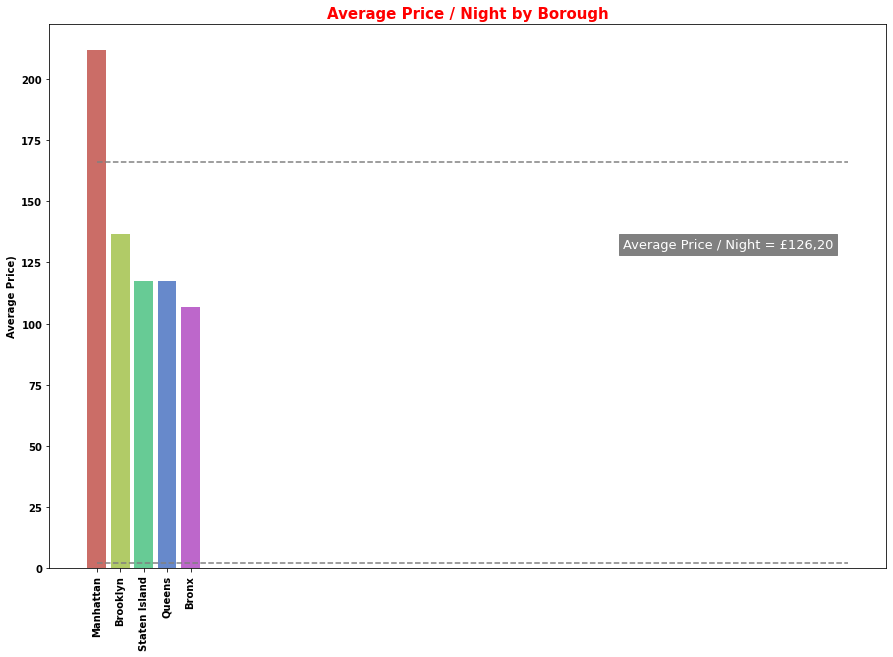

In [32]:
#We can see below that manhattan is the priciest
plt.figure(figsize=(15,10))

ax = sns.barplot(x="BORO", y="price", data=borough_group_price, palette = "hls")
sns.color_palette("hls", 8)
plt.title("Average Price / Night by Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Average Price)",weight= "bold",c="k")
plt.yticks(weight="bold")


x_coordinates = [0, 32]
y_median = [(airbnb.price.mean(),2), (airbnb.price.mean(),2)]

plt.plot(x_coordinates, y_median,linestyle = '--', c="gray")
plt.text(22.4,131,'Average Price / Night = £126,20',fontsize = 13,backgroundcolor = 'gray',color = 'white')


plt.show()

### <span style='color:darkcyan'> 4.6 Barplot of properties based on Borough that over 100 reviews <span style='color:green'>
    

In [33]:
# Group by Borough for total number of reviews

borough_group_reviews = airbnb.groupby("BORO").number_of_reviews.sum().sort_values(ascending=False)
borough_group_reviews = borough_group_reviews.reset_index()
borough_group_reviews["percentage"] = round(borough_group_reviews["number_of_reviews"] / borough_group_reviews["number_of_reviews"].sum()*100,2)
borough_group_reviews.head()


,BORO,number_of_reviews,percentage
0,Brooklyn,370122,43.25
1,Manhattan,297644,34.78
2,Queens,146308,17.10
3,Bronx,29528,3.45
4,Staten Island,12200,1.43


In [34]:
# Number of properties based on Borough that over 100 reviews

over_100_reviews = airbnb.sort_values("number_of_reviews",ascending=False)
over_100_reviews = over_100_reviews[over_100_reviews["number_of_reviews"]>=100]
over_100_reviews = over_100_reviews.groupby("BORO").count().sort_values("number_of_reviews",ascending=False).head(10)
over_100_reviews

,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
BORO,,,,,,,,,,,,,
Brooklyn,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103
Manhattan,767,767,767,767,767,767,767,767,767,767,767,767,767
Queens,418,418,418,418,418,418,418,418,418,418,418,418,418
Bronx,85,85,85,85,85,85,85,85,85,85,85,85,85
Staten Island,33,33,33,33,33,33,33,33,33,33,33,33,33


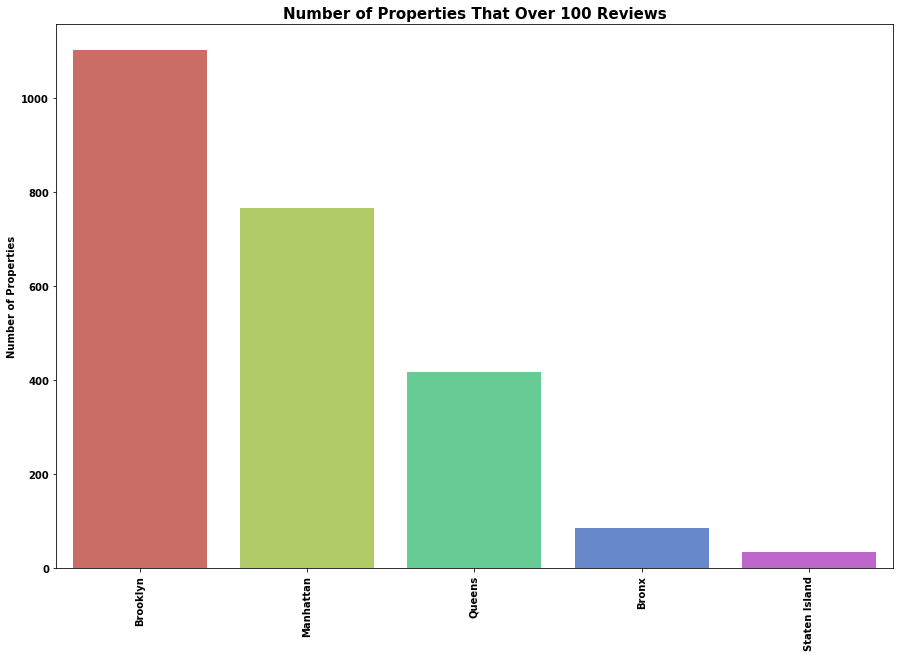

In [35]:
# Barplot of properties based on Borough that over 100 reviews

plt.figure(figsize=(15,10))

ax = sns.barplot(x=over_100_reviews.index, y="number_of_reviews", data=over_100_reviews, palette = "hls")
plt.title("Number of Properties That Over 100 Reviews", weight="bold", c="black", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.show()


### <span style='color:darkcyan'> 4.7 Heatmap of Property Type and Borough <span style='color:green'>

In [36]:
# Property Type and Borough

property_type_borough = airbnb.groupby(["BORO","room_type"]).count().reset_index()
property_type_borough = property_type_borough.pivot("room_type","BORO","id")
property_type_borough

BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,425.0,7299.0,9817.0,1954.0,183.0
Hotel room,NaN,4.0,188.0,7.0,NaN
Private room,586.0,6678.0,5771.0,2794.0,154.0
Shared room,25.0,183.0,239.0,110.0,2.0


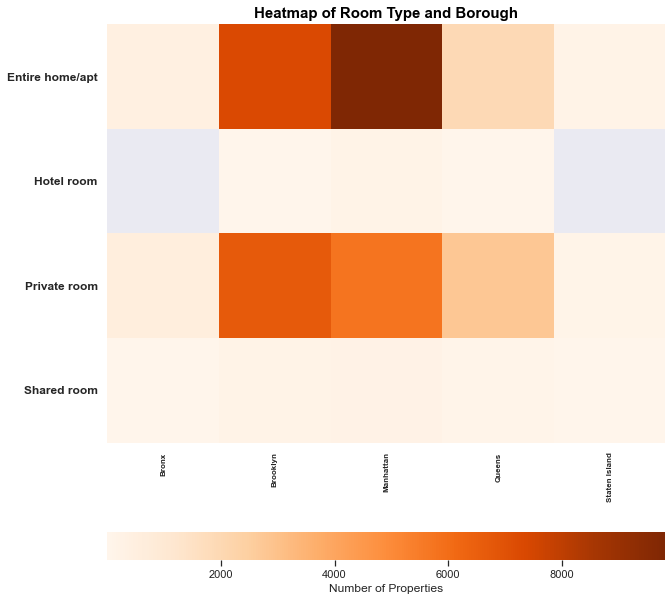

In [37]:
#Heatmap of Property Type and Borough

plt.figure(figsize=(10,11))
#,dpi=200),
sns.set(font_scale=1)
sns.heatmap(property_type_borough,annot=False, cmap="Oranges",cbar_kws={'label': 'Number of Properties','orientation':'horizontal'})

plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=12)
plt.xticks(weight="bold",rotation=90,size=8)
plt.title("Heatmap of Room Type and Borough",weight="bold",c="black", fontsize=15)

plt.show()





### <span style='color:darkcyan'> 4.8 Barplot of Availability Per Borough <span style='color:green'>

In [38]:
#Availability Per Borough of 365 day

occupancy_borough = airbnb.groupby("BORO").availability_365.mean().sort_values().reset_index()
occupancy_borough.head()

,BORO,availability_365
0,Brooklyn,112.121152
1,Manhattan,131.490790
2,Queens,158.364440
3,Bronx,192.427606
4,Staten Island,194.879056


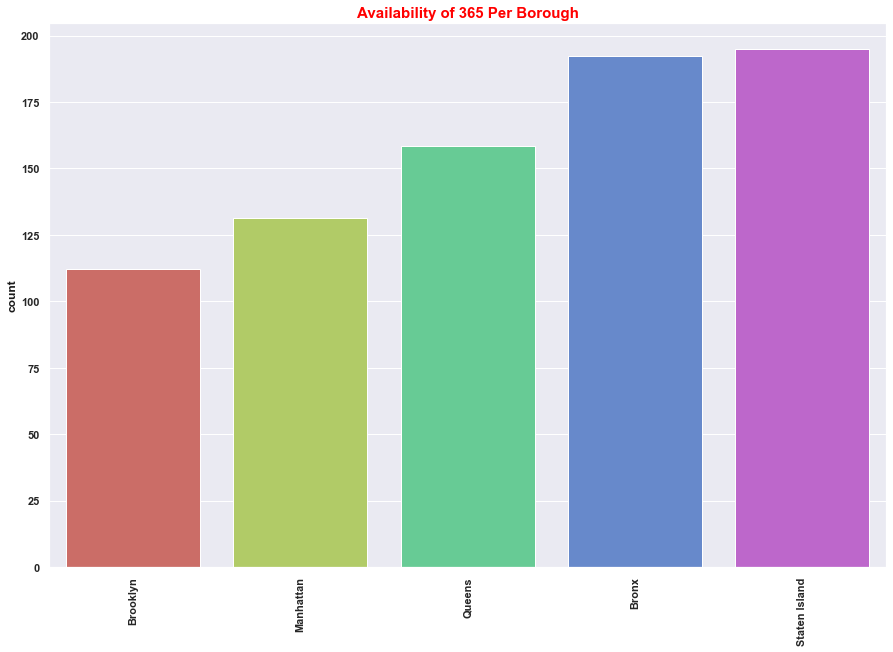

In [39]:
# Barplot of Availability Per Borough
occupancy_borough = occupancy_borough.tail(10)
plt.figure(figsize=(15,10))

ax = sns.barplot(x="BORO", y="availability_365", data=occupancy_borough, palette = "hls")
plt.title("Availability of 365 Per Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("count",weight= "bold",c="k")
plt.yticks(weight="bold")
#plt.savefig('images/06_Availabilityof365PerBorough.png', dpi=200)

plt.show()



### <span style='color:darkcyan'> 4.9 Scatter plot for location <span style='color:green'>

/Users/tej/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


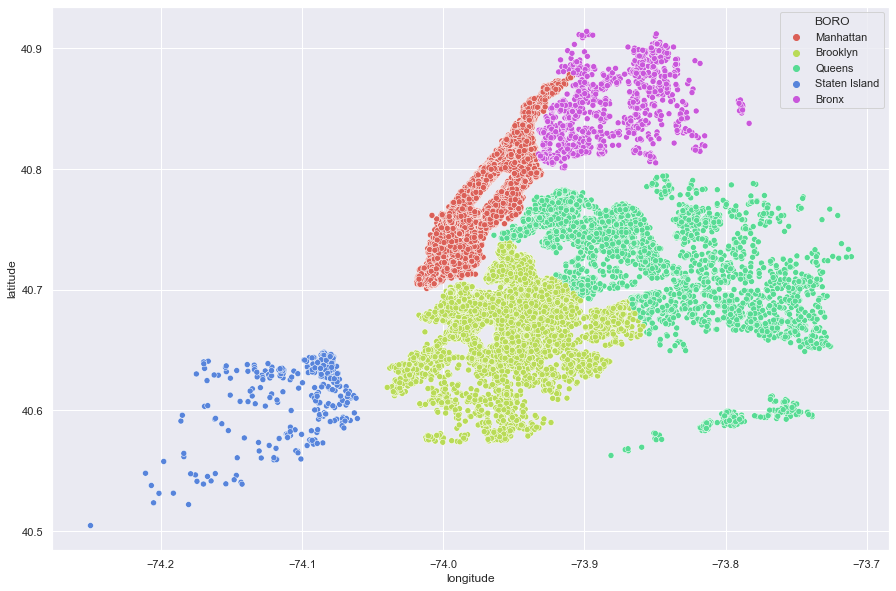

In [40]:
# 1) We can see that staten Island has the least number of hotels
# 2) Queens is the most spread out and
#Manhattan is the lease spreae out - yet has the most numbe of hotels
plt.figure(figsize=(15,10))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.BORO, palette = "hls")
#plt.ioff()
plt.show()

# <span style='color:darkcyan'> RESTAURANT DATA </span>

## <span style='color:darkcyan'> 1. Importing data </span>

In [41]:
restaurant = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [42]:
restaurant.head()


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41310519,LANTERN THAI,Manhattan,311,2 AVENUE,10003.0,2127772770,Thai,02/09/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,23.0,NaN,NaN,12/03/2021,Cycle Inspection / Initial Inspection,40.734924,-73.983062,106.0,2.0,4800.0,1019587.0,1.008990e+09,MN21
1,50086623,YAMATO,Brooklyn,168,7 AVENUE,11215.0,7188400099,Asian/Asian Fusion,01/15/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,5.0,A,01/15/2019,12/03/2021,Pre-permit (Operational) / Re-inspection,40.671864,-73.977444,306.0,39.0,15700.0,3020692.0,3.009660e+09,BK37
2,50003492,UNIQUE BAKERY,Brooklyn,6213,FORT HAMILTON PARKWAY,11219.0,7186809000,Chinese,07/06/2017,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,30.0,NaN,NaN,12/03/2021,Cycle Inspection / Initial Inspection,40.631982,-74.007184,310.0,38.0,21200.0,3141451.0,3.057290e+09,BK30
3,50009814,GAKYI ZOMPE RESTAURANT,Queens,4711,47TH AVE,11377.0,9172441287,Asian/Asian Fusion,05/17/2017,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,39.0,C,05/17/2017,12/03/2021,Cycle Inspection / Re-inspection,40.741025,-73.917967,402.0,26.0,23500.0,4001535.0,4.001510e+09,QN31
4,40873635,HE CHEROKEE DELI RESTAURANT,Brooklyn,1626,BROADWAY,11207.0,3476783509,Spanish,06/25/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,49.0,C,06/25/2019,12/03/2021,Cycle Inspection / Re-inspection,40.685012,-73.914196,316.0,41.0,37300.0,3040248.0,3.014990e+09,BK79


## <span style='color:darkcyan'> 2. Preprocessing <span style='color:green'>

### <span style='color:darkcyan'> 2.1 <span style='color:green'>

In [43]:
#check number of columns and rows
restaurant.shape

(383509, 26)

In [44]:
#check columns
restaurant.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

In [45]:
#check info
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383509 entries, 0 to 383508
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  383509 non-null  int64  
 1   DBA                    382380 non-null  object 
 2   BORO                   383509 non-null  object 
 3   BUILDING               382802 non-null  object 
 4   STREET                 383484 non-null  object 
 5   ZIPCODE                377904 non-null  float64
 6   PHONE                  383481 non-null  object 
 7   CUISINE DESCRIPTION    379422 non-null  object 
 8   INSPECTION DATE        383509 non-null  object 
 9   ACTION                 379423 non-null  object 
 10  VIOLATION CODE         374797 non-null  object 
 11  VIOLATION DESCRIPTION  377228 non-null  object 
 12  CRITICAL FLAG          383509 non-null  object 
 13  SCORE                  365900 non-null  float64
 14  GRADE                  194026 non-nu

In [46]:
#data seems alright 
restaurant.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,3.835090e+05,377904.000000,365900.000000,383126.000000,383126.000000,376918.000000,376918.000000,376918.000000,3.751590e+05,3.824980e+05
mean,4.647362e+07,10683.025337,20.467018,40.136236,-72.865215,248.841517,20.001342,28823.980768,2.514172e+06,2.404657e+09
std,4.351217e+06,601.942393,15.059114,4.879896,8.858659,130.196103,15.700190,30473.811184,1.346570e+06,1.339179e+09
min,3.007544e+07,10000.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.144838e+07,10022.000000,11.000000,40.686556,-73.988816,105.000000,4.000000,8000.000000,1.044111e+06,1.010460e+09
50%,5.001424e+07,10469.000000,15.000000,40.732868,-73.957303,301.000000,20.000000,16300.000000,3.008396e+06,3.001870e+09
75%,5.006503e+07,11229.000000,26.000000,40.762024,-73.897295,401.000000,34.000000,40400.000000,4.002493e+06,4.001718e+09
max,5.011764e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


In [47]:
#Latitude and longitude cannot be 0,therefore lets remove it
restaurant= restaurant[restaurant['Longitude'] != 0]
restaurant= restaurant[restaurant['Latitude'] != 0]



### <span style='color:darkcyan'> 2.2 Let us first remove all the columns from restaurants dataframe that are not of interest for our analysis and also rename some of them </span>

In [48]:
#removing the column
restaurant = restaurant.drop(columns=['BUILDING', 'RECORD DATE','GRADE DATE','Community Board',
                                      'INSPECTION TYPE','Council District', 'VIOLATION DESCRIPTION', 'ACTION',
          'Census Tract','BIN','BBL','NTA', 
   ])

### <span style='color:darkcyan'> 2.3 Renaming </span>



In [49]:
#renaming some of the columns
restaurant = restaurant.rename(columns={"DBA": "NAME"}, errors="raise")

In [50]:
#restaurant size is very huge- running out of memeory while merging
restaurant.size

5291006

In [51]:
#edit the column name for easy reading

restaurant.columns = [c.replace(' ', '_') for c in restaurant.columns]

### <span style='color:darkcyan'> 2.4 Check for null values
</span>




In [52]:
#check all the null values for column
restaurant.isnull().sum()

CAMIS                       0
NAME                     1117
BORO                        0
STREET                     25
ZIPCODE                    25
PHONE                      28
CUISINE_DESCRIPTION      4025
INSPECTION_DATE             0
VIOLATION_CODE           8518
CRITICAL_FLAG               0
SCORE                   17349
GRADE                  186910
Latitude                  383
Longitude                 383
dtype: int64

### <span style='color:darkcyan'> 2.5. Drop some of the null rows </span>

In [53]:
#since our data is huge, lets remove restaurants which are not graded or scored or without any 
#longitude and latitude
restaurant = restaurant.dropna(subset=['SCORE','NAME','GRADE','Latitude','Longitude'])



### <span style='color:darkcyan'> 2.6 Check the number of duplicated rows </span>

In [54]:
#check the number of duplicated rows - lot of duplicates
restaurant.duplicated().sum()

14095

In [55]:
#lets remove the duplicated rows
restaurant.drop_duplicates(subset=None, keep="first", inplace=True)

In [56]:
restaurant.duplicated().sum()

0

In [57]:
#convert to datatime
restaurant['INSPECTION_DATE'] =  pd.to_datetime(restaurant['INSPECTION_DATE'])

In [58]:
#check for unique years
pd.DatetimeIndex(restaurant['INSPECTION_DATE']).year.unique()

Int64Index([2019, 2017, 2018, 2020, 2021, 2016, 2015, 2014, 2013], dtype='int64', name='INSPECTION_DATE')

In [59]:
#Create separate columns for year and month to use later
restaurant['year'] = pd.DatetimeIndex(restaurant['INSPECTION_DATE']).year
restaurant['month'] = pd.DatetimeIndex(restaurant['INSPECTION_DATE']).month

In [60]:
restaurant.columns

Index(['CAMIS', 'NAME', 'BORO', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE_DESCRIPTION', 'INSPECTION_DATE', 'VIOLATION_CODE',
       'CRITICAL_FLAG', 'SCORE', 'GRADE', 'Latitude', 'Longitude', 'year',
       'month'],
      dtype='object')

### <span style='color:darkcyan'> 2.7 Establishments with inspection date of 1/1/1900 are new establishments that have not yet received an inspection. </span>




In [61]:
#We'll remove them
pd.set_option("display.max_rows", None)

#restaurant['INSPECTION_DATE'].value_counts(ascending=True)

In [62]:
INSPECTION_DATE = restaurant['INSPECTION_DATE']

INSPECTION_DATE.count() 

176665

In [63]:
#restaurant[restaurant['INSPECTION_DATE'] == '1900-01-01']

In [64]:
#len(restaurant[restaurant['INSPECTION_DATE'] == '1900-01-01'])

In [65]:
#len(restaurant[restaurant['year'] == 1900])


In [66]:
#removing them
restaurant = restaurant[restaurant['INSPECTION_DATE'] != '1900-01-01']

In [67]:
pd.DatetimeIndex(restaurant['INSPECTION_DATE']).year

Int64Index([2019, 2017, 2019, 2017, 2018, 2020, 2017, 2019, 2018, 2017,
            ...
            2019, 2018, 2019, 2018, 2018, 2019, 2019, 2019, 2018, 2018],
           dtype='int64', name='INSPECTION_DATE', length=176665)

### <span style='color:darkcyan'> 2.8 Check inspection date by year </span>



In [68]:
#check inspection date by year-We can see above that from 2009 to 2015 there are total 
#of 127 inspection.Therefore lets remove it
restaurant['INSPECTION_DATE'].dt.year.value_counts(ascending=True)

2013        6
2014        9
2015       53
2016     5118
2021    11513
2020    15290
2017    28038
2018    48971
2019    67667
Name: INSPECTION_DATE, dtype: int64

In [69]:
#removing dates from 2013-1015
restaurant = restaurant[(restaurant['INSPECTION_DATE'].dt.year != 2009) & (restaurant['INSPECTION_DATE'].dt.year != 2013) & 
           (restaurant['INSPECTION_DATE'].dt.year != 2014) & (restaurant['INSPECTION_DATE'].dt.year != 2015)]


In [70]:
restaurant['INSPECTION_DATE'].dt.year.value_counts(ascending=True)

2016     5118
2021    11513
2020    15290
2017    28038
2018    48971
2019    67667
Name: INSPECTION_DATE, dtype: int64


### <span style='color:darkcyan'> 2.9 Check number of unique restaurant names </span>

In [71]:

len(restaurant['NAME'].unique())

20304

### <span style='color:darkcyan'> 2.10 Check for duplicate names </span>

In [72]:
#number of duplicates - 
restaurant['NAME'].duplicated().sum()

156293

In [73]:
#Thats a lot, lets remove them
restaurant = restaurant.drop_duplicates(subset=['NAME'], keep='last')

In [74]:
#check number of unique restaurant names
restaurant['NAME'].duplicated().sum()

0

In [75]:
#significant reduction in the shape
restaurant.shape

(20304, 16)

In [76]:
#Number of Unique Establishment
len(restaurant['CAMIS'].unique())

20304

In [77]:
#Which borough the inspections are held in?
restaurant['BORO'].unique()

array(['Queens', 'Manhattan', 'Bronx', 'Brooklyn', 'Staten Island'],
      dtype=object)

### <span style='color:darkcyan'> 2.11 Number of Rows with BORO = 0 </span>

In [78]:
#Number of Rows with BORO =0
#len(restaurant[restaurant['BORO']=='0'])

In [79]:
#there are 103 rows with borough =0, We should remove them as part of data learning process
#restaurant = restaurant[restaurant['BORO'] != '0']

In [80]:
#len(restaurant[restaurant['BORO']=='0'])

In [81]:
restaurant = restaurant.sort_values(by=["NAME", "year"])

In [82]:
restaurant.shape

(20304, 16)

In [83]:

len(restaurant[restaurant['SCORE'] < 10])

6724


### <span style='color:darkcyan'> 2.12 Lets pick restaurants with the best score for merging </span>

In [84]:
restaurant = (restaurant[restaurant['SCORE'] < 10])

In [85]:
#309765 before actions
restaurant.size

107584

In [86]:
restaurant.shape

(6724, 16)

### <span style='color:darkcyan'> 2.13 Merge on Subset of dataframes  </span>

In [87]:
### Since the dataframes are very large, Merging uses all the RAM and doesnt run,
### Therefore will do the analysis on subset of data

In [88]:

new = airbnb[:2000]

In [89]:
#len(new[new['BORO']=='Manhattan'])

In [90]:
new.head()

,id,name,host_name,BORO,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,73,1,408,4.91,220,38
2,5121,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,0.53,365,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,0.02,91,1
4,5178,Large Furnished Room Near B'way,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,505,3.70,218,31


In [91]:
result = pd.merge(new, restaurant, on="BORO", how='inner',)


In [92]:
#res = airbnb.loc[airbnb.index.intersection(restaurant.index)]

In [93]:
#4239949
result.shape

(4280795, 29)

In [94]:
result.head()

,id,name,host_name,BORO,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,CAMIS,NAME,STREET,ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,VIOLATION_CODE,CRITICAL_FLAG,SCORE,GRADE,Latitude,Longitude,year,month
0,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,40359480,1 EAST 66TH STREET KITCHEN,EAST 66 STREET,10065.0,2128793900,American,2019-10-01,10F,Not Critical,9.0,A,40.768547,-73.969581,2019,10
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,40401104,1020 BAR,AMSTERDAM AVENUE,10025.0,2125313468,American,2017-10-11,08A,Not Critical,9.0,A,40.803093,-73.963782,2017,10
2,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50059935,108 FOOD DRIED HOT POT,BROADWAY,10025.0,9176756878,Chinese,2018-05-30,10F,Not Critical,9.0,A,40.802765,-73.967636,2018,5
3,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,40673117,10TH AVENUE PIZZA & CAFE,10TH AVE BET 24 & 25 ST ),10001.0,2123669222,Pizza,2020-02-11,09B,Not Critical,9.0,A,40.748819,-74.003335,2020,2
4,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50052807,11 HOWARD KITCHEN,LAFAYETTE STREET,10013.0,6469371256,American,2020-01-23,10F,Not Critical,9.0,A,40.719077,-73.999953,2020,1


In [95]:
#renaming some of the columns
result = result.rename(columns={"NAME" : "REST_NAME","STREET":"REST_STREET","ZIPCODE":"REST_ZIPCODE", "Latitude" : "REST_LATITUDE", "Longitude":"REST_LONGITUDE"}, 
                       errors="raise")


In [96]:
#result = result.rename(columns={"Latitude" : "REST_LATITUDE","Longitude":"REST_LOGITUDE"}, 
                     #  errors="raise")

In [97]:
#I had to reduce the number of columns on airbnb because it is using whole RAM. 
#For analysis just on the Airbnb 
#I'll be using the whole dataset but for merging and analysis on the merged dataset 
#i'll be using just 5000 rows of the dataset

In [98]:

column = result['SCORE']
max_value = result['SCORE'].max()
max_value

9.0



### <span style='color:darkcyan'> 3.1 Which rooms have the best restaurants nearby </span>


In [99]:
#which rooms have the best restaurants nearby
name_group_score = result.groupby("name").SCORE.min().sort_values(ascending=False)
name_group_score = name_group_score.reset_index()


In [100]:
name_group_score.head(5)

,name,SCORE
0,!!!NYC is back!!! Designer amazing room in NYC!!,0.0
1,Panoramic View Central Park & NYC,0.0
2,Park Slope Sunny Studio,0.0
3,Park Slope Pre-War Apartment,0.0
4,Park Slope One bedroom with Balcony,0.0


In [101]:
restaurant['BORO'] = restaurant.index


### <span style='color:darkcyan'> 3.2 We can check which restaurant is nearest to the hotel </span>



In [102]:
test = result[result['name']=='Skylit Midtown Castle']

In [103]:
test.head()

,id,name,host_name,BORO,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,CAMIS,REST_NAME,REST_STREET,REST_ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,VIOLATION_CODE,CRITICAL_FLAG,SCORE,GRADE,REST_LATITUDE,REST_LONGITUDE,year,month
0,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,40359480,1 EAST 66TH STREET KITCHEN,EAST 66 STREET,10065.0,2128793900,American,2019-10-01,10F,Not Critical,9.0,A,40.768547,-73.969581,2019,10
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,40401104,1020 BAR,AMSTERDAM AVENUE,10025.0,2125313468,American,2017-10-11,08A,Not Critical,9.0,A,40.803093,-73.963782,2017,10
2,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50059935,108 FOOD DRIED HOT POT,BROADWAY,10025.0,9176756878,Chinese,2018-05-30,10F,Not Critical,9.0,A,40.802765,-73.967636,2018,5
3,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,40673117,10TH AVENUE PIZZA & CAFE,10TH AVE BET 24 & 25 ST ),10001.0,2123669222,Pizza,2020-02-11,09B,Not Critical,9.0,A,40.748819,-74.003335,2020,2
4,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50052807,11 HOWARD KITCHEN,LAFAYETTE STREET,10013.0,6469371256,American,2020-01-23,10F,Not Critical,9.0,A,40.719077,-73.999953,2020,1


In [104]:
test['val']= (abs(test['longitude'] - test['REST_LONGITUDE']))

<ipython-input-104-2109d43cab6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['val']= (abs(test['longitude'] - test['REST_LONGITUDE']))


#### Lets calculate the distance between latitude and Longitudes for restaurants and hotels

In [105]:
import geopy.distance 

for i in range(len(test)):
    coords_1 = (test['longitude'][i], test['latitude'][i])
    coords_2 = (test['REST_LONGITUDE'][i], test['REST_LATITUDE'][i])
    test['val'][i] = geopy.distance.geodesic(coords_1, coords_2).km
    i+=1

<ipython-input-105-e7b0e72df02f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['val'][i] = geopy.distance.geodesic(coords_1, coords_2).km
/Users/tej/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [106]:
test.head()

,id,name,host_name,BORO,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,CAMIS,REST_NAME,REST_STREET,REST_ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,VIOLATION_CODE,CRITICAL_FLAG,SCORE,GRADE,REST_LATITUDE,REST_LONGITUDE,year,month,val
0,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,40359480,1 EAST 66TH STREET KITCHEN,EAST 66 STREET,10065.0,2128793900,American,2019-10-01,10F,Not Critical,9.0,A,40.768547,-73.969581,2019,10,1.845520
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,40401104,1020 BAR,AMSTERDAM AVENUE,10025.0,2125313468,American,2017-10-11,08A,Not Critical,9.0,A,40.803093,-73.963782,2017,10,2.873284
2,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50059935,108 FOOD DRIED HOT POT,BROADWAY,10025.0,9176756878,Chinese,2018-05-30,10F,Not Critical,9.0,A,40.802765,-73.967636,2018,5,2.513058
3,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,40673117,10TH AVENUE PIZZA & CAFE,10TH AVE BET 24 & 25 ST ),10001.0,2123669222,Pizza,2020-02-11,09B,Not Critical,9.0,A,40.748819,-74.003335,2020,2,1.985840
4,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50052807,11 HOWARD KITCHEN,LAFAYETTE STREET,10013.0,6469371256,American,2020-01-23,10F,Not Critical,9.0,A,40.719077,-73.999953,2020,1,1.922819


/Users/tej/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


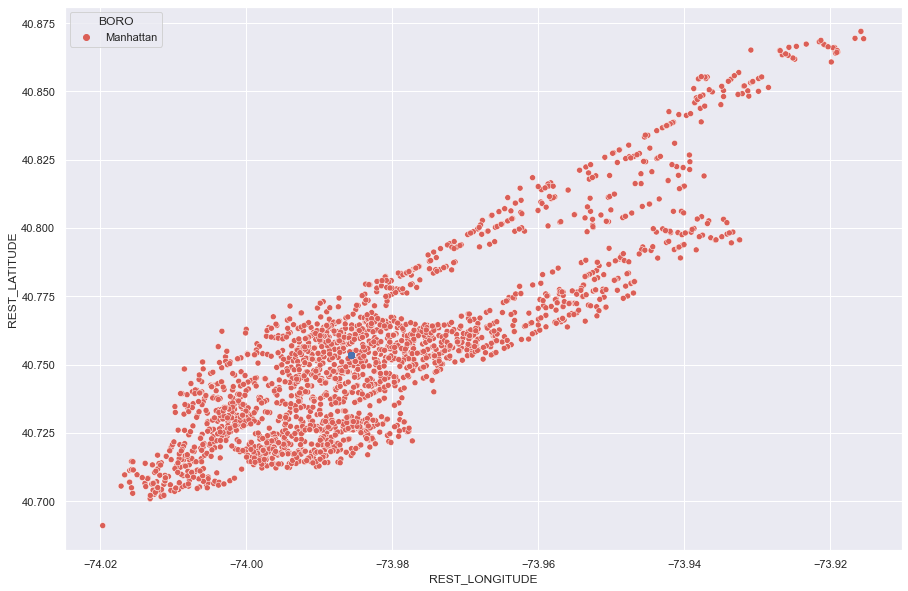

In [107]:
#we can see below that there are many restaurants near Skylit Midtown Castle but we need better methodes to calculate the distance
plt.figure(figsize=(15,10))
sns.scatterplot(test.REST_LONGITUDE, test.REST_LATITUDE, hue=test.BORO, palette = "hls")
plt.scatter(x=test['longitude'], y=test['latitude'], color='b')
#plt.ioff()
plt.show()


### look for which restaurants are nearest

In [108]:

closest = test.nsmallest(100, 'val')

In [109]:
closest.head(5)

,id,name,host_name,BORO,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,CAMIS,REST_NAME,REST_STREET,REST_ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,VIOLATION_CODE,CRITICAL_FLAG,SCORE,GRADE,REST_LATITUDE,REST_LONGITUDE,year,month,val
1936,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,41477830,RESIDENCE INN TIMES SQUARE,6 AVENUE,10018.0,2127680007,American,2019-03-26,06A,Critical,5.0,A,40.752696,-73.985671,2019,3,0.028100
1725,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50060497,ORTZI RESTAURANT AND BAR LOCATED INSIDE LOUMA ...,WEST 41 STREET,10036.0,2127308900,Basque,2017-10-17,10B,Not Critical,7.0,A,40.754522,-73.985458,2017,10,0.033101
2501,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50095248,UNCLE TETSU JAPANESE CHEESECAKE,WEST 41 STREET,10036.0,4169047876,Japanese,2021-11-04,10F,Not Critical,8.0,A,40.754684,-73.985797,2021,11,0.041607
2563,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50070744,WASABI SUSHI BENTO 6TH AVE,6 AVENUE,10018.0,9172614132,Japanese,2017-12-18,10B,Not Critical,2.0,A,40.752167,-73.986039,2017,12,0.066003
645,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50073945,DADONG NEW YORK,WEST 42 STREET,10036.0,2123559600,Chinese,2019-03-05,10B,Not Critical,4.0,A,40.755172,-73.984938,2019,3,0.088124


/Users/tej/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


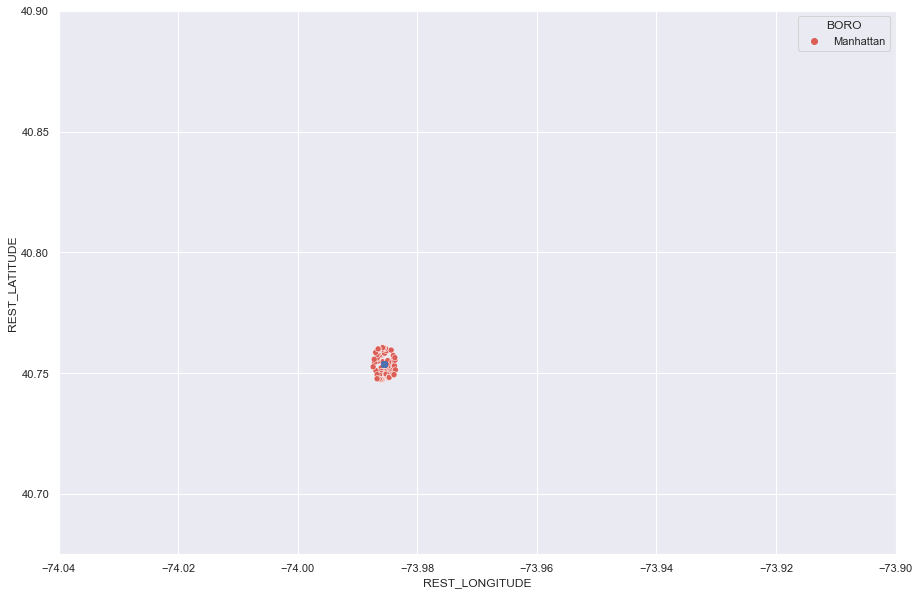

In [110]:

plt.figure(figsize=(15,10))
plt.ylim(40.675, 40.900)
plt.xlim(-74.04,-73.90)
sns.scatterplot(closest.REST_LONGITUDE, closest.REST_LATITUDE, hue=closest.BORO, palette = "hls")
plt.scatter(x=closest['longitude'], y=closest['latitude'], color='b')
#plt.ioff()
plt.show()

### <span style='color:darkcyan'> 3.3 Best restaurants out of all the closest </span>

In [111]:

closest.nsmallest(5, 'SCORE')

,id,name,host_name,BORO,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,CAMIS,REST_NAME,REST_STREET,REST_ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,VIOLATION_CODE,CRITICAL_FLAG,SCORE,GRADE,REST_LATITUDE,REST_LONGITUDE,year,month,val
732,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50096314,E-MO KIMBOB,WEST 32 STREET,10001.0,2125941466,Korean,2019-10-07,NaN,Critical,0.0,A,40.747308,-73.985903,2019,10,0.195731
809,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,41486645,EXECUTIVE DINNING ROOM,BRYANT PARK,10036.0,6468554206,American,2020-02-11,NaN,Not Applicable,0.0,A,40.755175,-73.983880,2020,2,0.197208
2563,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50070744,WASABI SUSHI BENTO 6TH AVE,6 AVENUE,10018.0,9172614132,Japanese,2017-12-18,10B,Not Critical,2.0,A,40.752167,-73.986039,2017,12,0.066003
1704,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50096064,OLE & STEEN,WEST 40 STREET,10018.0,9292091540,Bakery Products/Desserts,2020-02-25,10F,Not Critical,2.0,A,40.753327,-73.984541,2020,2,0.117282
1928,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50001916,REFINERY LOBBY BAR,WEST 38 STREET,10018.0,8477859617,American,2016-06-20,10H,Not Critical,2.0,A,40.751766,-73.984628,2016,6,0.120750


In [112]:
#check unique cusines
closest['CUISINE_DESCRIPTION'].unique()

array(['American', 'Basque', 'Japanese', 'Chinese', 'Sandwiches', 'Irish',
       'Hawaiian', 'Coffee/Tea', 'Tex-Mex', 'Asian/Asian Fusion',
       'Bakery Products/Desserts', 'Korean', 'Latin American', 'French',
       'Frozen Desserts', 'Eastern European', 'Steakhouse', 'Continental',
       'Chinese/Cuban', 'Jewish/Kosher', 'Mediterranean',
       'Southeast Asian', 'Thai', 'Other'], dtype=object)


### <span style='color:darkcyan'> 3.4 Check the nearest places with american cuisine </span>

In [113]:
check = closest[closest['CUISINE_DESCRIPTION']=='American'].nsmallest(5, 'val')

In [114]:
check = check[check['CUISINE_DESCRIPTION']=='American'].nsmallest(5, 'SCORE')

In [115]:
### Lets see how far they are from the hotel
check.head()

,id,name,host_name,BORO,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,CAMIS,REST_NAME,REST_STREET,REST_ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,VIOLATION_CODE,CRITICAL_FLAG,SCORE,GRADE,REST_LATITUDE,REST_LONGITUDE,year,month,val
1928,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50001916,REFINERY LOBBY BAR,WEST 38 STREET,10018.0,8477859617,American,2016-06-20,10H,Not Critical,2.0,A,40.751766,-73.984628,2016,6,0.120750
1936,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,41477830,RESIDENCE INN TIMES SQUARE,6 AVENUE,10018.0,2127680007,American,2019-03-26,06A,Critical,5.0,A,40.752696,-73.985671,2019,3,0.028100
2552,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50005331,Vivid Cabaret,WEST 37 STREET,10018.0,2123912702,American,2017-10-24,10B,Not Critical,5.0,A,40.751129,-73.985032,2017,10,0.097367
2527,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,41356242,VIACOM EXECUTIVE DINING ROOM,BROADWAY,10036.0,2122586290,American,2017-07-28,06D,Critical,5.0,A,40.757629,-73.985803,2017,7,0.127584
1074,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,0.33,322,0,50060232,HOLIDAY INN EXPRESS MANHATTAN TIMES SQUARE SOUTH,WEST 36 STREET,10018.0,2128973388,American,2019-06-19,10F,Not Critical,7.0,A,40.750660,-73.985884,2019,6,0.095194


/Users/tej/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


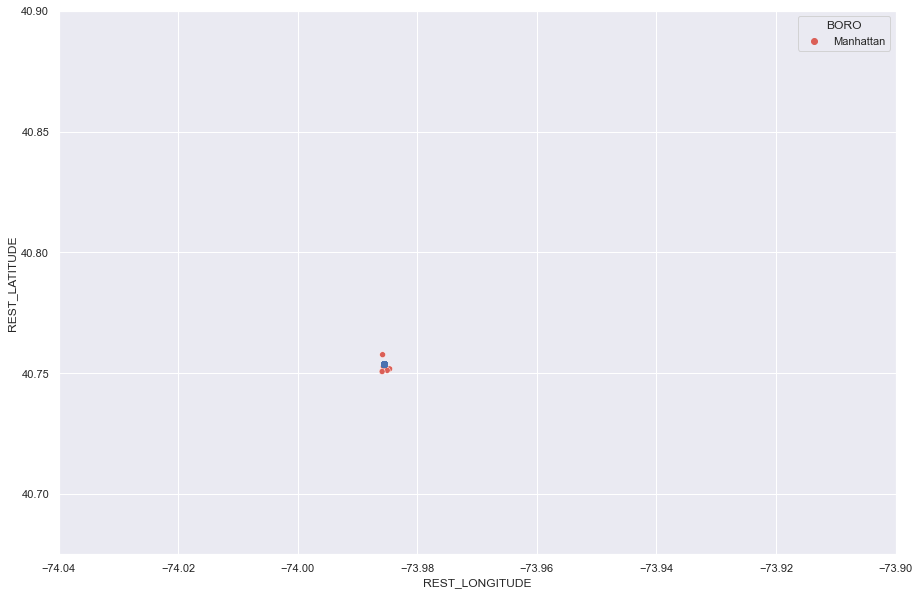

In [116]:
plt.figure(figsize=(15,10))
plt.ylim(40.675, 40.900)
plt.xlim(-74.04,-73.90)
sns.scatterplot(check.REST_LONGITUDE, check.REST_LATITUDE, hue=check.BORO, palette = "hls")
plt.scatter(x=closest['longitude'], y=closest['latitude'], color='b')
#plt.ioff()
plt.show()

Conclusion:

Finding best location to choose when you're staying at an Airbnb depends on several factors - in this Visualization I considered restaurants and also several other attributes.
1. We saw most people prefer to stay at Entire/Homes or Apts. Therefore, if somebody were to expand their business it is better to expand in Homes/Apartments.
2. Manhattan had the most number of hotels, while the place was smallest. The distribution of homes in manhattan is also compact. Additionally, the homes are always filled.(no occupancy) This tells us there is a great demand for homes in Manhattan. This could also be a business strategy to buy more homes in manhattan.
3. On the other hand we saw price to be higher in Manhattan. Therefore, in a customers view point it is better to avoid staying at manhattan and is better to stay at brooklyn as price is reasonable and also has best reviews.


---------------------------------------------------
4. Finally we saw how we can use restaurant inspection data to find best restaurants near by with respect to location, score(Inspection) as well as cuisine.
5. All of this can be combined to build some sort of a Restaurant recommendation system with more advanced tools.

